<a href="https://colab.research.google.com/github/acorbe/tensorflow2-lattice-boltzmann-D2Q9-python/blob/master/LBM_D2Q9_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing python libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

# Domain size and parameters 
Nx = 32  # domain size in X
Ny = 64  # domain size in Y
q = 9  # number of velocity directions 

tau = 1.0
omega = 1. / tau
nu = (1.0/3.0) * (tau - 0.5)
tmax = 200
tsave = 1
L  = Ny/1.  # characteristic length
u0 = 0.20  # characteristic velocity

e = np.array([[0,0],[1,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[-1,-1],[1,-1]])
w = np.array([4./9., 1./9., 1./9., 1./9., 1./9., 1./36., 1./36., 1./36., 1./36.])


# defining PDFs 
f = np.zeros([q,Nx,Ny])
feq = np.zeros([q,Nx,Ny])
fp = np.zeros([q,Nx,Ny])

# defining macroscopic variables
x = np.linspace(0,Nx-1,Nx)
y = np.linspace(0,Ny-1,Ny)
rho = np.zeros([Nx,Ny])
ux = np.zeros([Nx,Ny])
uy = np.zeros([Nx,Ny])

# initialising velocity nad density
rho[:,:] = 1.
ux[:,:] = u0*np.sin(2.*np.pi*y/L)
uy[:,:] = 0.
vel = np.stack([ux,uy])


### y position with maximum velocity
ymax = np.argmax(ux[5,:])
uxmax = np.zeros([tmax])


# initialising PDFs f=feq
#  calculating equilibrium pdf
feq = (w[:,np.newaxis,np.newaxis]*rho[np.newaxis,:,:]*
       (3*np.sum((e[:,:,np.newaxis,np.newaxis]*vel[np.newaxis,:,:,:]),axis=1)
        +9/2*(np.sum((e[:,:,np.newaxis,np.newaxis]*vel[np.newaxis,:,:,:]),axis=1)**2)
        -3/2*(vel[np.newaxis,0,:,:]*vel[np.newaxis,0,:,:]+vel[np.newaxis,1,:,:]*vel[np.newaxis,1,:,:])+1.0))

#  initialising pdf with equlibrium values
f = feq
fp = feq

data1 = open("density.txt","w+")

###### time loop #######
for time in range(tmax):
    print(time)
    #streaming
    for k in range(q):
        fp[k,:,:] = np.roll(np.roll(f[k,:,:],e[k,0],axis=0),e[k,1],axis=1)
    #calculatig macro vaiables
    rho = np.sum(fp,axis=0)
    ux = np.sum((e[:,0][:,np.newaxis,np.newaxis] * fp),axis=0)/rho
    uy = np.sum((e[:,1][:,np.newaxis,np.newaxis] * fp),axis=0)/rho
    vel = np.stack([ux,uy])
    dens = 0.
    dens = np.sum(rho[:,:])
    
    # saving ux velocity at ymax point
    uxmax[time] = ux[5,ymax]
    
    
#    print(dens)
    data1.write("%d %.15g \n" % (time+1,dens) )
    
    #calculating equilibrium pdf
    feq = (w[:,np.newaxis,np.newaxis]*rho[np.newaxis,:,:]*
           (3*np.sum((e[:,:,np.newaxis,np.newaxis]*vel[np.newaxis,:,:,:]),axis=1)
            +9/2*(np.sum((e[:,:,np.newaxis,np.newaxis]*vel[np.newaxis,:,:,:]),axis=1)**2)
            -3/2*(vel[np.newaxis,0,:,:]*vel[np.newaxis,0,:,:]+vel[np.newaxis,1,:,:]*vel[np.newaxis,1,:,:])+1.0))
    # collision
    f = omega*feq+(1.0-omega)*fp
    
#    if (time%tsave==0): # Visualization
#        plt.clf(); 
#        plt.imshow(np.sqrt(vel[0]**2+vel[1]**2).transpose(),cmap=cm.Reds)
#        plt.savefig("vel."+str(time/1000).zfill(4)+".png")
    
#    print(time)

data1.close()



np.savetxt('velocity.txt', ux)


#print(uxmax)

#print(vel_plot.shape)

#plt.plot(uxa[2,:], -y, 'r',label='Intial');
#plt.grid()
#plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [0]:

feq.shape

(9, 32, 64)

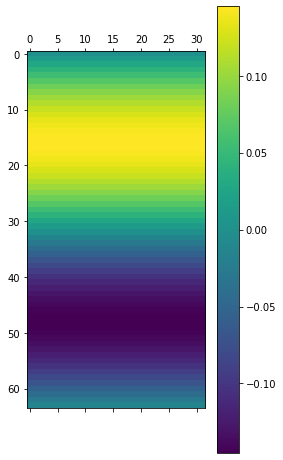

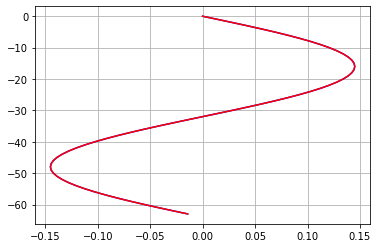

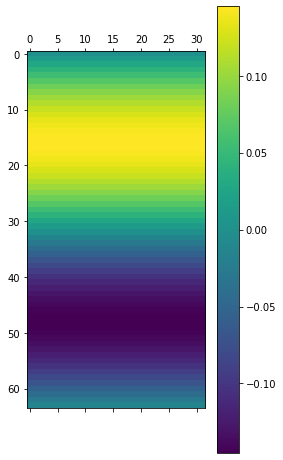

In [0]:

# Anlytical solution
uxa = np.zeros([Nx,Ny])
kap = 2*np.pi/L
nu = (tau-0.5)/3.
uxa[:,:] = (u0*np.exp(-tmax*nu*kap*kap)*np.sin(2.*np.pi*y[np.newaxis,:]/L))


plt.matshow(vel[0,:,:].T)
plt.colorbar()
plt.show()



plt.plot(ux[2,:], -y, 'b',label='Intial');
plt.plot(uxa[2,:], -y, 'r',label='Intial');
plt.grid()
plt.show()


plt.matshow(uxa.T)
plt.colorbar()
plt.show()


[0.16791977] 0.16666666666666666


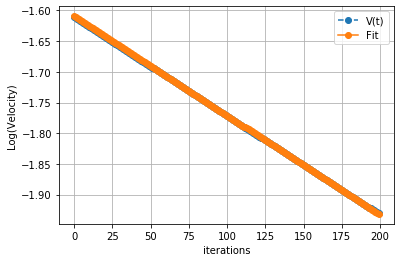

In [0]:
from scipy.optimize import curve_fit

#print(uxmax)

def fit_log(x,a):
    return np.log(u0)+np.log((np.sin(2*np.pi*(ymax)/L)))-1.0*a*a*kap*kap*x



t = np.arange(0,tmax,tsave,dtype=np.float)
#print(t)
popt, pcov = curve_fit(fit_log, t, np.log(uxmax))
print(popt*popt,nu)
plt.plot(t,np.log(uxmax),'--o',label='V(t)')
plt.plot(t,fit_log(t,popt),'-o',label='Fit')
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Log(Velocity)')
plt.legend()





In [0]:
Vel=np.loadtxt("velocity.txt")

Vel.shape

uxa.shape

#L2 norm error in ux velocity
L2error = np.sqrt((np.sum((ux-uxa)**2))/(Nx*Ny))

L2error



5.673416021631913e-09

[0.16799396] 0.16666666666666666


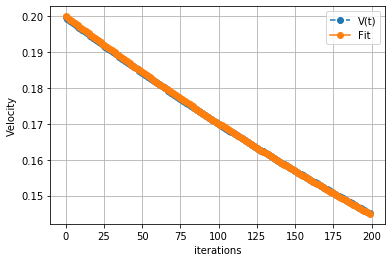

In [0]:
from scipy.optimize import curve_fit

def fit(x,a):
    return u0*np.sin(2*np.pi*(ymax)/L)*np.exp(-1.0*a*a*kap*kap*x)

popt, pcov = curve_fit(fit, t, uxmax)
print(popt*popt,nu)
plt.plot(t,uxmax,'--o',label='V(t)')
plt.plot(t,fit(t,popt),'-o',label='Fit')
#plt.xlim(-0.5, 20.0)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Velocity')
plt.legend()


